## Flipkart Products Data Webscrapping

####  We will use Auto Scrapper library , For more details https://pypi.org/project/autoscraper/

Install the necessary Libraries 

In [ ]:
# !pip install autoscrapper
# !pip install pandas

import the libraries

In [1]:
from autoscraper import AutoScraper

In [2]:
import pandas as pd

In intial Phase you have to tell the Autoscrapper what type of data you need , for this open up flipkart and search for product you want to collect data and give its Feutres what you want to collect , Here i am collecting Product name , Price and rating so i pasted name , price , Rating of First Product

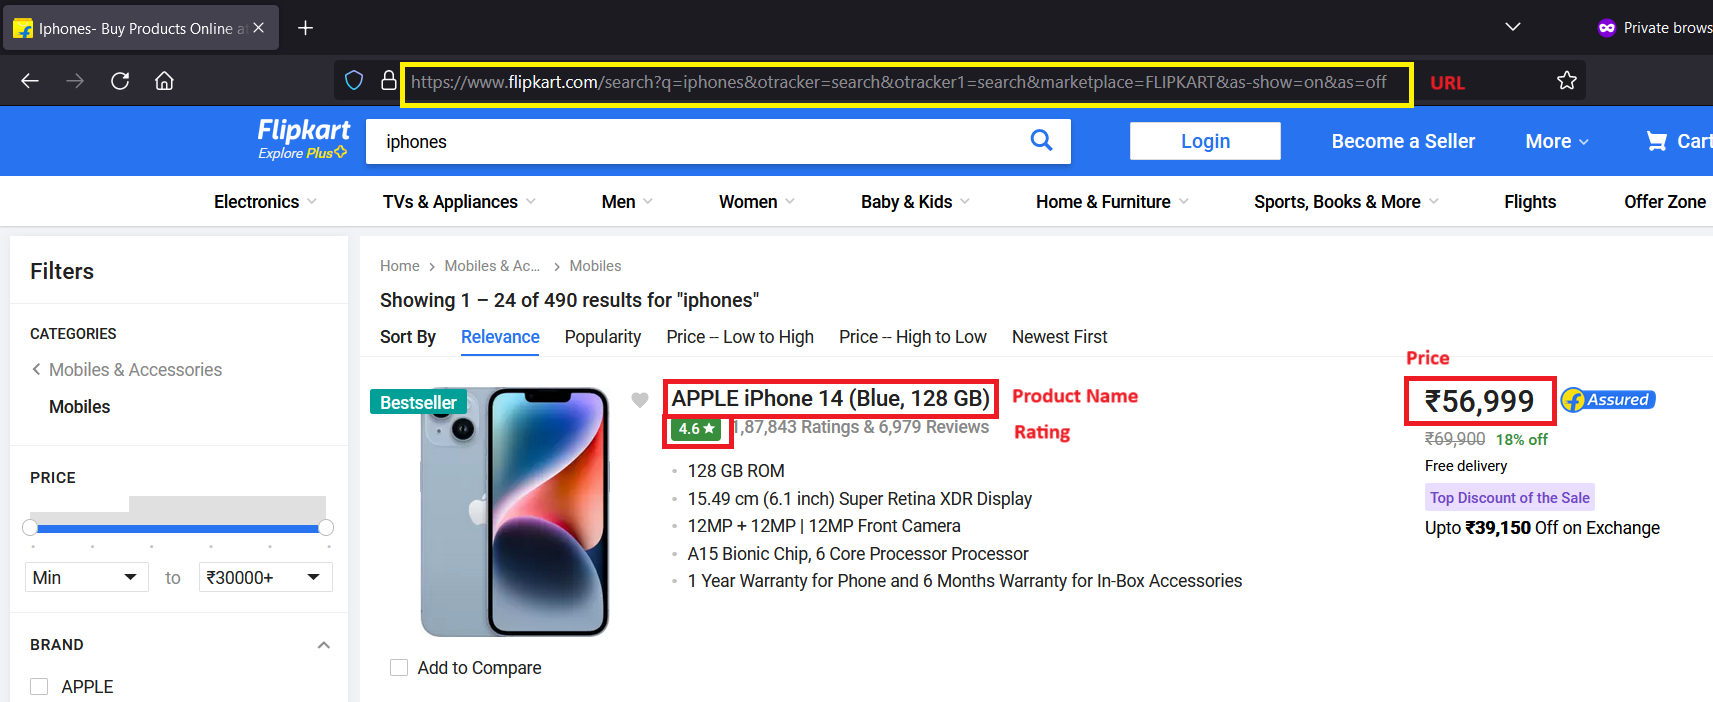

In [3]:
url='https://www.flipkart.com/search?q=iphones'

wanted_list=['APPLE iPhone 14 (Blue, 128 GB)','₹56,999','4.6']

intialise the auto scraper function

In [4]:
scraper=AutoScraper()

using Build method we are requesting our Wanted list from website URL

In [5]:
result=scraper.build(url,wanted_list)

All the metadata related to our Wanted list will be collected , not in order but as a bulk data 

In [6]:
print (result)

['APPLE iPhone 14 (Blue, 128 GB)', 'APPLE iPhone 14 (Starlight, 128 GB)', 'APPLE iPhone 14 (Midnight, 128 GB)', 'APPLE iPhone 14 (Purple, 128 GB)', 'APPLE iPhone 14 Plus (Blue, 128 GB)', 'APPLE iPhone 14 Plus (Starlight, 128 GB)', 'APPLE iPhone 14 Plus (Midnight, 128 GB)', 'APPLE iPhone 14 Plus (Purple, 128 GB)', 'APPLE iPhone 12 (Blue, 128 GB)', 'APPLE iPhone 12 (Black, 128 GB)', 'APPLE iPhone 12 (White, 128 GB)', 'APPLE iPhone 12 (Blue, 64 GB)', 'APPLE iPhone 14 ((PRODUCT)RED, 128 GB)', 'APPLE iPhone 12 (White, 64 GB)', 'APPLE iPhone 12 (Black, 64 GB)', 'APPLE iPhone 13 (Blue, 128 GB)', 'APPLE iPhone 12 (Green, 128 GB)', 'APPLE iPhone 14 (Blue, 256 GB)', 'APPLE iPhone 12 (Green, 64 GB)', 'APPLE iPhone 14 (Midnight, 256 GB)', 'APPLE iPhone 14 (Starlight, 256 GB)', 'APPLE iPhone 15 (Blue, 128 GB)', 'APPLE iPhone 14 (Purple, 256 GB)', 'APPLE iPhone 13 (Midnight, 128 GB)', '₹51,999', '₹40,999', '₹56,999', '₹79,900', '₹64,999', '₹44,999', '₹66,999', '4.7', '4.6']


cleaning and separating the similar type of Data using .get_result_similar Method

In [7]:
scraper.get_result_similar(url,grouped=True)

{'rule_gpqm': ['APPLE iPhone 14 (Blue, 128 GB)',
  'APPLE iPhone 14 (Starlight, 128 GB)',
  'APPLE iPhone 14 (Midnight, 128 GB)',
  'APPLE iPhone 14 (Purple, 128 GB)',
  'APPLE iPhone 14 Plus (Blue, 128 GB)',
  'APPLE iPhone 14 Plus (Starlight, 128 GB)',
  'APPLE iPhone 14 Plus (Midnight, 128 GB)',
  'APPLE iPhone 14 Plus (Purple, 128 GB)',
  'APPLE iPhone 12 (Blue, 128 GB)',
  'APPLE iPhone 12 (Black, 128 GB)',
  'APPLE iPhone 12 (White, 128 GB)',
  'APPLE iPhone 14 ((PRODUCT)RED, 128 GB)',
  'APPLE iPhone 12 (Blue, 64 GB)',
  'APPLE iPhone 12 (White, 64 GB)',
  'APPLE iPhone 12 (Black, 64 GB)',
  'APPLE iPhone 15 (Blue, 128 GB)',
  'APPLE iPhone 13 (Blue, 128 GB)',
  'APPLE iPhone 12 (Green, 128 GB)',
  'APPLE iPhone 14 (Blue, 256 GB)',
  'APPLE iPhone 12 (Green, 64 GB)',
  'APPLE iPhone 15 (Black, 128 GB)',
  'APPLE iPhone 14 (Midnight, 256 GB)',
  'APPLE iPhone 14 (Starlight, 256 GB)',
  'APPLE iPhone 14 (Purple, 256 GB)'],
 'rule_irfl': ['APPLE iPhone 14 (Blue, 128 GB)',
  'APPLE 

A number dictionaries will be produced after separation of similar data , they will be named like this rule_tcvg ,rule_1b9g 
for understanding check out the below image  
Every Time you request data you will get unique names , so names will change but remember how they look like and copy the best ones from each category

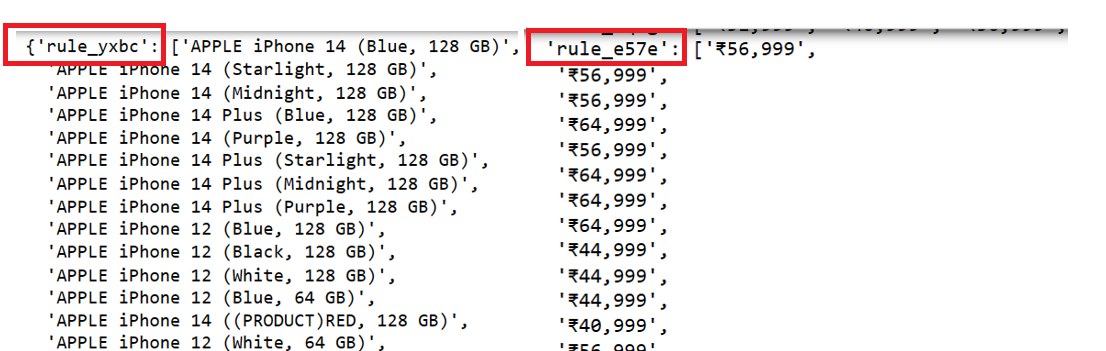

paste those here and give them approriate names

In [8]:
scraper.set_rule_aliases({'rule_irfl':'Title','rule_ukml':'Price','rule_9zbo':'Rating'})

you can save these rules for other Products too so you dont have do this again

In [9]:
scraper.keep_rules(['rule_irfl','rule_ukml','rule_9zbo'])

In [ ]:
# you can save this model and share it with you friends or use later
# To use later use scraper.load('flipkart_search')

In [10]:
scraper.save('flipkart_search')

Defined a FlipkartSearch Function Here,
for use scraping other products as an example we have given name , price , rating of a iphone , our scraper will collect the same type of data with other products as well , and we used common url for searching products in flipkart and appended our input product to it to get search results

Using pandas we transformed the output data into a DataFrame

In [11]:
def FlipkartSearch(search):
    url='https://www.flipkart.com/search?q='+search
    wanted_list=['APPLE iPhone 14 (Blue, 128 GB)','₹56,999','4.6']
    product=scraper.get_result_similar(url,group_by_alias=True)
    products_data=pd.DataFrame(product)
    return products_data

In [12]:
search=input("enter Your search:")
FlipkartSearch(search)

enter Your search:Samsung Phones


,Title,Price,Rating
0,"SAMSUNG Galaxy F34 5G (Orchid Violet, 128 GB)","₹16,499",4.3
1,"SAMSUNG Galaxy F34 5G (Electric Black, 128 GB)","₹16,499",4.3
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹6,499",4.2
3,"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)","₹6,499",4.2
4,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹12,490",4.2
5,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)","₹12,490",4.2
6,"SAMSUNG Galaxy M14 5G (Smoky Teal, 128 GB)","₹12,901",4.2
7,"SAMSUNG Galaxy F34 5G (Orchid Violet, 128 GB)","₹18,499",4.2
8,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)","₹12,490",4.2
9,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹9,499",4.3
